In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ

In [2]:
import os
import numpy as np
from PIL import Image
import pandas as pd

VERİ YOLUNUNUN VE ÇIKTI DİZİNLERİNİN TANIMLANMASI

In [3]:
# Veri yolunu ve çıktı dizinlerini tanımla
input_directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/'
output_directory = '/kaggle/working/compressed_fish_images/'

In [ ]:
# Görüntülerin yeniden boyutlandırılacağı hedef boyut
target_size = (128, 128)

> Programın hızını arttırmak için ben görüntü boyutunu azaltmayı hedefledim

In [ ]:
# Etiketler ve dosya yolları için listeler
labels = []
paths = []

KLASÖR YAPISINDAKİ BALIK TÜRLERİNİN OKUNMASI VE EĞER ÇIKTI DİZİNİ YOKSA, OLUŞTURULMASI

In [ ]:
# Klasör yapısındaki balık türlerini oku
fish_types = [name for name in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, name))]

# Eğer çıktı dizini yoksa oluştur
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [ ]:
# Kullanıcıya balık türlerini yazdır
print("Balık Türleri:")
for fish in fish_types:
    print(fish)

In [ ]:
!pip install seaborn matplotlib

In [2]:
for fish_type in fish_types:
    fish_type_dir = os.path.join(input_directory, fish_type)
    sub_folders = [sub_folder for sub_folder in os.listdir(fish_type_dir) if os.path.isdir(os.path.join(fish_type_dir, sub_folder))]
​
    for sub_folder in sub_folders:
        image_dir = os.path.join(fish_type_dir, sub_folder)
        output_dir = os.path.join(output_directory, fish_type, sub_folder)
​
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
​
        for img_file in os.listdir(image_dir):
            img_path = os.path.join(image_dir, img_file)
            output_img_path = os.path.join(output_dir, img_file.replace('.jpg', '.npz').replace('.png', '.npz'))
#BURADA DEPOLAMAYI DAHA İYİ YÖNETMEK VE VERİ İŞLEME HIZINI ARTTIRMAK AMACIYLA DOSYAMI '.npz' FORMATINDA KAYDETMEYİ TERCİH ETTİM
​
#GÖRÜNTÜ BOYUTUNUN AYARLANMASI VE NORMALİZASYON İŞLEMİ
            try:
                if os.path.isfile(img_path) and img_file.endswith('.png'):  # Sadece .png dosyalarını seçiyoruz
                    # Görüntüyü aç, yeniden boyutlandır ve normalize et
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(target_size)  # Görüntü boyutunu hedef boyuta küçült
                    img_array = np.array(img)
                    img_normalized = img_array / 255.0  # Normalizasyon
​
                    # Sıkıştırılmış formatta kaydet (.npz)
                    np.savez_compressed(output_img_path, img_normalized)
​
                    # Etiket ve dosya yolunu kaydet
                    labels.append(fish_type)  # Balık türünü etiket olarak ekle
                    paths.append(output_img_path)  # Sıkıştırılmış dosya yolunu ekle
​
                    print(f"Resized, normalized, and compressed {img_file}")
            except Exception as e: # hata yakalayabilmek için
                print(f"Error processing image {img_file}: {e}")

Resized, normalized, and compressed 00929.png
Resized, normalized, and compressed 00704.png
Resized, normalized, and compressed 00562.png
Resized, normalized, and compressed 00237.png
Resized, normalized, and compressed 00406.png
Resized, normalized, and compressed 00448.png
Resized, normalized, and compressed 00255.png
Resized, normalized, and compressed 00435.png
Resized, normalized, and compressed 00365.png
Resized, normalized, and compressed 00105.png
Resized, normalized, and compressed 00936.png
Resized, normalized, and compressed 00512.png
Resized, normalized, and compressed 00869.png
Resized, normalized, and compressed 00669.png
Resized, normalized, and compressed 00733.png
Resized, normalized, and compressed 00657.png
Resized, normalized, and compressed 00033.png
Resized, normalized, and compressed 00096.png
Resized, normalized, and compressed 00185.png
Resized, normalized, and compressed 00238.png
Resized, normalized, and compressed 00488.png
Resized, normalized, and compresse

VERİLERİ PANDAS DATAFRAME'E DÖNÜŞTÜRME

In [4]:
# Etiketleme ve dosya yollarını CSV dosyasına kaydetme
data = pd.DataFrame({'path': paths, 'label': labels})
data.to_csv(os.path.join(output_directory, 'image_labels.csv'), index=False)
print(f"{len(data)} adet görüntü başarıyla etiketlendi ve kaydedildi.")


18000 adet görüntü başarıyla etiketlendi ve kaydedildi.


VERİ ÇERÇEVESİNİN İNCELENMESİ VE KAYDEDİLMESİ (CVS FORMATINDA)

In [5]:
# CSV dosyasının varlığını kontrol etme
csv_path = os.path.join(output_directory, 'image_labels.csv')
if os.path.exists(csv_path):
    print("CSV dosyası başarıyla bulundu!")
else:
    print("CSV dosyası bulunamadı!")


CSV dosyası başarıyla bulundu!


In [7]:
from sklearn.model_selection import train_test_split

# Veri setinin CSV'den yüklenmesi
data_path = os.path.join(output_directory, 'image_labels.csv')
data = pd.read_csv(data_path)


Eğitim seti boyutu: 14400
Test seti boyutu: 3600


VERİ AYRIŞTIRMA (TRAIN-TEST)

In [ ]:
# Eğitim ve test setlerinin ayrılması (%80 eğitim, %20 test)
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)

# Eğitim ve test setlerinin CSV olarak kaydedilmesi
train_data.to_csv(os.path.join(output_directory, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(output_directory, 'test_data.csv'), index=False)

print(f"Eğitim seti boyutu: {len(train_data)}")
print(f"Test seti boyutu: {len(test_data)}")
#eğitim ve test setlerinin boyutları yazdırılır.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

# Veri yükleme ve ayrıştırma (görüntüleri yükle)
def load_data(data_paths):
    images = []
    labels = []
    for index, row in data_paths.iterrows():
        img = np.load(row['path'])['arr_0']  # Sıkıştırılmış npz dosyalarını yükle
        images.append(img)
        labels.append(row['label'])
    
    return np.array(images), np.array(labels)

# Eğitim ve test verilerini yükleyin
train_images, train_labels = load_data(train_data)
test_images, test_labels = load_data(test_data)

# Yapay Sinir Ağı modelini oluştur
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Görüntüleri 1D vektör haline getiriyoruz
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')  # Çıktı katmanı (her sınıf için bir nöron)
])

# Modeli derleme
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',  # Çok sınıflı sınıflandırma için uygun kayıp fonksiyonu
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
from sklearn.preprocessing import LabelEncoder

# Label encoder oluşturma
label_encoder = LabelEncoder()

# Etiketleri sayısal değerlere çevirme (hem eğitim hem de test setleri için)

train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

#BUNU YAPMAMIN SEBEBİ MODEL EĞİTİLİRKEN SIKINTI ÇIKMASINI ÖNLEMEK

# Dönüştürdükten sonra modelinizi eğitebilirsiniz
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=10, batch_size=32)

# Sonuçları değerlendirme
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test setindeki kayıp (loss): {loss}")
print(f"Test setindeki doğruluk (accuracy): {accuracy}")

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.2898 - loss: 2.8755 - val_accuracy: 0.4322 - val_loss: 1.5149
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.5225 - loss: 1.3333 - val_accuracy: 0.5650 - val_loss: 1.1960
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.6057 - loss: 1.0816 - val_accuracy: 0.6244 - val_loss: 1.0261
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.6550 - loss: 0.9672 - val_accuracy: 0.6422 - val_loss: 1.0171
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.6945 - loss: 0.8350 - val_accuracy: 0.6119 - val_loss: 1.0986
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7101 - loss: 0.7867 - val_accuracy: 0.6642 - val_loss: 0.9188
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.7332 - loss: 0.7304 - val_accuracy: 0.6722 - val_loss: 0.9335
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.7474 - loss: 0.6811 - 

**BURADA PROJEMİ DAHA İYİ BİR HALE GETİRMEK İÇİN OPTİMİZE EDİP TEKRAR DÜZENLİYORUM: 
DROPOUT KATMANI EKLİYORUM VE LEARNİNG RATE AYARLAMASINI DAHİL EDİYORUM**

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:

# Modeli tanımlama
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout katmanı ekleme
    Dense(len(np.unique(labels)), activation='softmax')  # Sınıf sayısına göre çıkış katmanı
])

# Modeli derleme (learning rate ayarlaması)
model.compile(optimizer=Adam(learning_rate=0.0001),  # Düşük öğrenme oranı
              loss='sparse_categorical_crossentropy',  # Çok sınıflı sınıflandırma için uygun kayıp fonksiyonu
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=10, batch_size=32)

# Sonuçları değerlendirme
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test setindeki kayıp (loss): {loss}")
print(f"Test setindeki doğruluk (accuracy): {accuracy}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 196s 432ms/step - accuracy: 0.3201 - loss: 1.8329 - val_accuracy: 0.6436 - val_loss: 1.0275
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 200s 428ms/step - accuracy: 0.6103 - loss: 1.0820 - val_accuracy: 0.7186 - val_loss: 0.8418
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 202s 427ms/step - accuracy: 0.6809 - loss: 0.8978 - val_accuracy: 0.7494 - val_loss: 0.7288
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 212s 449ms/step - accuracy: 0.7314 - loss: 0.7525 - val_accuracy: 0.7692 - val_loss: 0.6674
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 256s 435ms/step - accuracy: 0.7681 - loss: 0.6645 - val_accuracy: 0.7839 - val_loss: 0.6272
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 197s 438ms/step - accuracy: 0.7976 - loss: 0.5758 - val_accuracy: 0.7947 - val_loss: 0.5881
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 195s 434ms/step - accuracy: 0.8173 - loss: 0.5153 - val_accuracy: 0.8097 - val_loss: 0.5554
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 196s 436ms/step - accuracy: 0.8328 -

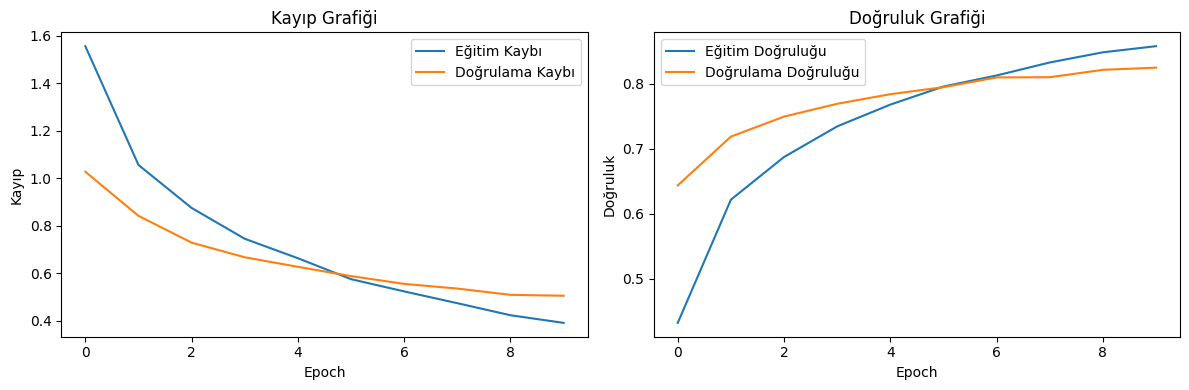

In [18]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizme
plt.figure(figsize=(12, 4))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()
